# Classify BBB molecules using PubMed BERT

- Load BBB dataset with pre-defined train-test split
- Load pretrained model from HuggingFace
- Fine-tune pretrained model using BBB dataset
- Evaluate the models performance

In [1]:
!pip install transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 121.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Mount google drive to access files

In [14]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
from simpletransformers.classification import ClassificationModel
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import sklearn

In [4]:
# load PubMed BERT tokenizer from HuggingFace
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [20]:
train_df = pd.read_csv("https://staicentreprod001.blob.core.windows.net/share/mlprague23/B3DB_cleaned_name_TRAIN.csv")
train_df = train_df.drop(columns=["split"]) # if you use your preprocessed data you don't need this line
train_df.head()

,name,label
0,crotetamide,1
1,imiclopazine,1
2,isopentylacetate,1
3,brotizolam,1
4,dimeprozan,1


In [21]:
test_df = pd.read_csv("https://staicentreprod001.blob.core.windows.net/share/mlprague23/B3DB_cleaned_name_TEST.csv")
test_df = test_df.drop(columns=["split"]) # if you use your preprocessed data you don't need this line
test_df.head()

,name,label
0,dronedarone,0
1,calciumfolinate,1
2,chembl195725,1
3,lometraline,1
4,schembl7481790,1


- Simple Transfomers package makes it easy to fine-tune transformer models for any task
- See here for help on defining a classification model: https://simpletransformers.ai/docs/classification-models/
- If the tokenizer is not specified, the model_type will be used to determine the type of the tokenizer
- You can pass a wide range of arguments for the model training, see here for inspiration: https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model
- These arguments can help boost your model performance so feel free to play around with them :)


In [22]:
model = ClassificationModel('bert', model_name, args={'learning_rate': 1e-4, 'train_batch_size':32,'num_train_epochs': 3, 'overwrite_output_dir': True})

Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Ber

In [23]:
# Create directory to store model weights (change path accordingly to where you want)
!mkdir -p PubMed_BERT_test_run

- Train the model that you defined: https://simpletransformers.ai/docs/classification-models/#training-a-classification-model


In [24]:
# Train the model
model.train_model(train_df, eval_df=test_df, output_dir='/content/PubMed_BERT_test_run')

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/3364 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/106 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/106 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/106 [00:00<?, ?it/s]

(318, 0.5530693396082464)

In [25]:
# accuracy
result, model_outputs, wrong_predictions = model.eval_model(test_df, acc=sklearn.metrics.f1_score)
pred_test = np.argmax(model_outputs, axis=-1)

# print results
print(result)
print(model_outputs)
print(wrong_predictions)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/842 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/106 [00:00<?, ?it/s]

{'mcc': 0.4402932019877863, 'tp': 470, 'tn': 166, 'fp': 120, 'fn': 86, 'auroc': 0.7926906726367158, 'auprc': 0.8707040630393132, 'acc': 0.8202443280977312, 'eval_loss': 0.54763455660838}
[[ 1.15917969 -1.02050781]
 [ 0.88134766 -0.52539062]
 [-0.06744385  0.72216797]
 ...
 [-0.0625      0.57519531]
 [-1.01269531  1.72460938]
 [-0.94628906  1.67382812]]
[{'guid': 1, 'text_a': 'calciumfolinate', 'text_b': None, 'label': 1}, {'guid': 6, 'text_a': 'bdbm86425', 'text_b': None, 'label': 0}, {'guid': 7, 'text_a': 'zinc11616623', 'text_b': None, 'label': 0}, {'guid': 9, 'text_a': 'cesamet', 'text_b': None, 'label': 1}, {'guid': 16, 'text_a': 'zinc27644005', 'text_b': None, 'label': 0}, {'guid': 20, 'text_a': 'tretinoin', 'text_b': None, 'label': 1}, {'guid': 23, 'text_a': 'clemastine', 'text_b': None, 'label': 1}, {'guid': 32, 'text_a': 'algestone', 'text_b': None, 'label': 1}, {'guid': 33, 'text_a': 'amprenavir', 'text_b': None, 'label': 1}, {'guid': 37, 'text_a': 'zinc252676467', 'text_b': N

In [26]:
predictions, raw_outputs = model.predict(['threomefloquine'])
print(predictions)
print(raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1]
[[0.18225098 0.42651367]]


In [27]:
predictions, raw_outputs = model.predict(['crotetamide'])
print(predictions)
print(raw_outputs)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

[1]
[[-0.94482422  1.546875  ]]


In [29]:
print("Test accuracy: {:.2f}".format(sklearn.metrics.accuracy_score(test_df.label, pred_test)))

# print classification report
print(sklearn.metrics.classification_report(test_df.label, pred_test, digits=2))

Test accuracy: 0.76
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       286
           1       0.80      0.85      0.82       556

    accuracy                           0.76       842
   macro avg       0.73      0.71      0.72       842
weighted avg       0.75      0.76      0.75       842



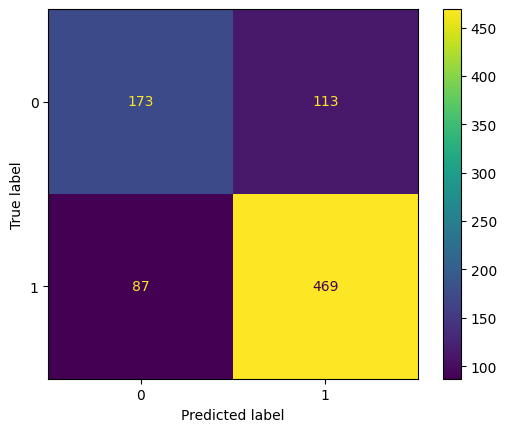

In [ ]:
# print confusion matrix